In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import boxcox 


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

### 1.Get the numerical variables from our dataset.


In [7]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


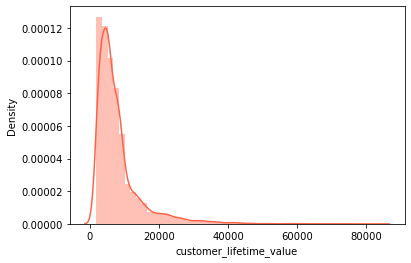

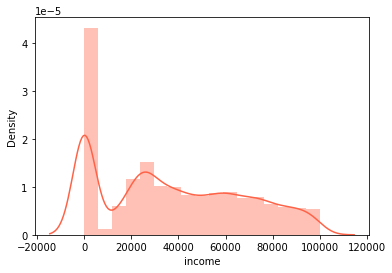

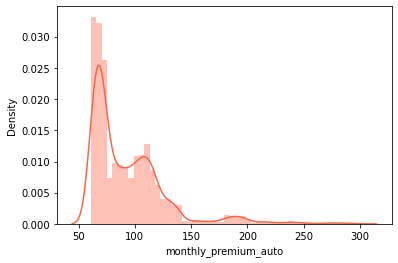

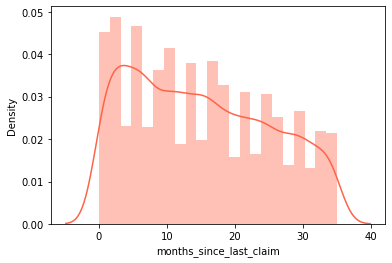

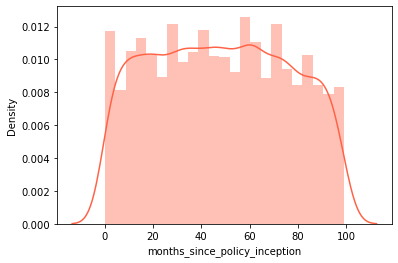

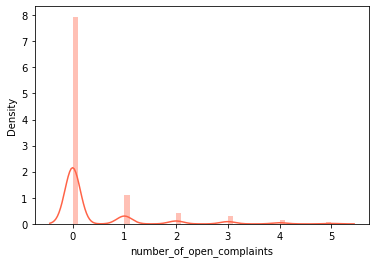

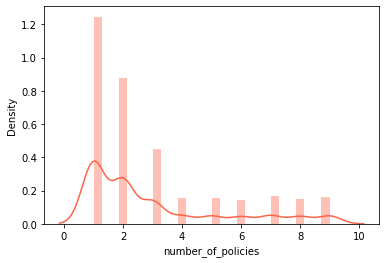

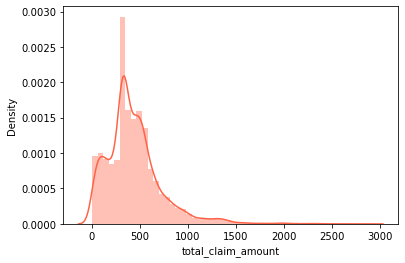

In [8]:
for column in numericals.columns:
    sns.distplot(numericals[column], kde=True, color = 'tomato')
    plt.show()

### 3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### 1.1 Log-Transform

In [9]:
numericals_lt=numericals.copy()
numericals_lt

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numericals_lt = pd.DataFrame(imputer.fit_transform(numericals_lt),columns = numericals_lt.columns)

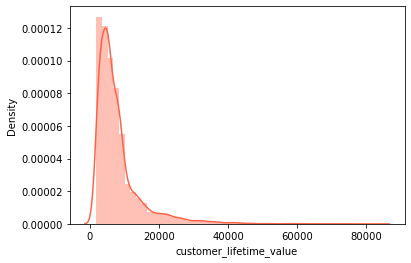

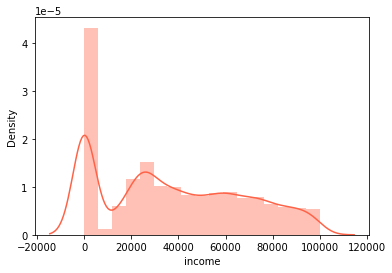

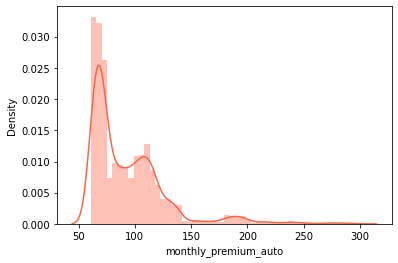

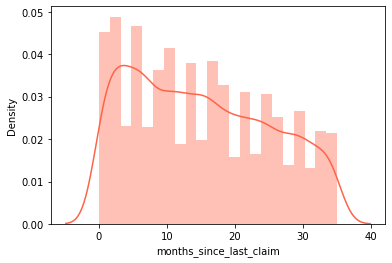

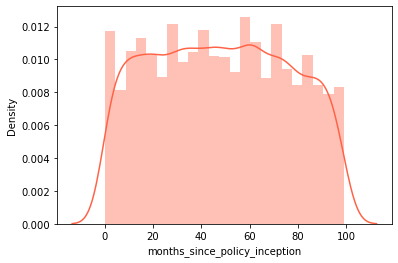

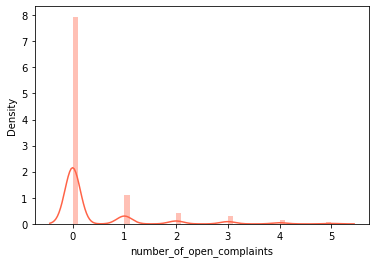

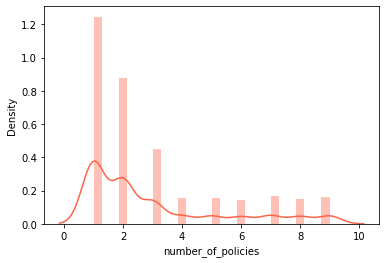

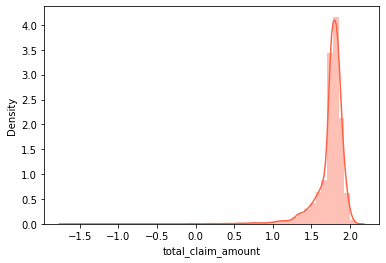

In [16]:
numericals_lt[column] = numericals_lt[column].apply(np.log)
for column in numericals_lt.columns:
    sns.distplot(numericals_lt[column], kde=True, color = 'tomato')
    plt.show()

#### 1.2 Box-Cox Transormation

In [13]:
numericals_bc=numericals.copy()
numericals_bc

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [17]:
def boxcox_transform(numericals_bc):
    numeric_cols = numericals_bc.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        numericals_bc[column] = np.where(numericals_bc[column]<=0, np.NAN, numericals_bc[column]) 
        numericals_bc[column] = numericals_bc[column].fillna(numericals_bc[column].mean())
        transformed_data, ci = stats.boxcox(numericals_bc[column])
        numericals_bc[column] = transformed_data
        _ci[column] = [ci] 
    return numericals, _ci
numericals_bc, _ci = boxcox_transform(numericals_bc)
numericals_bc.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154


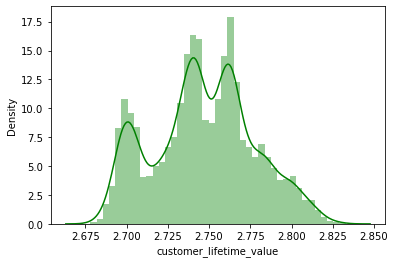

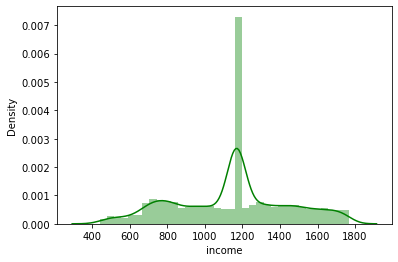

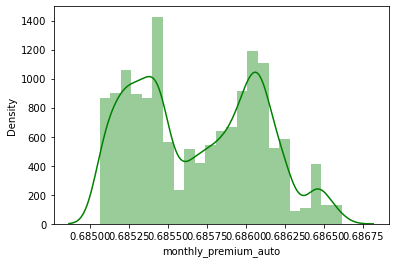

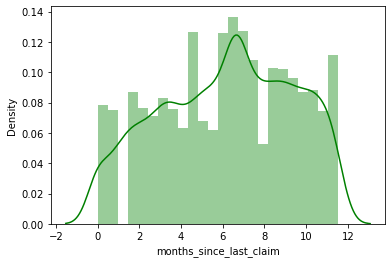

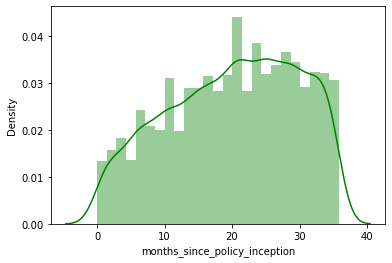

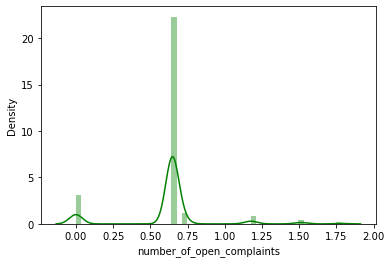

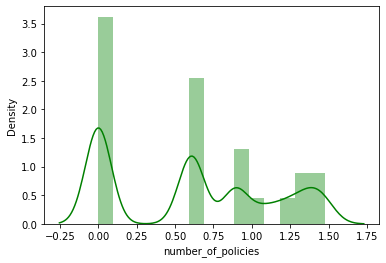

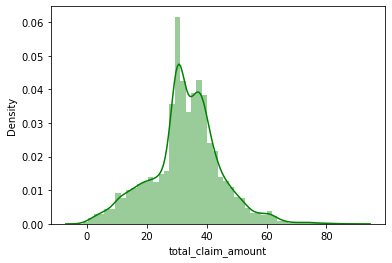

In [18]:
for column in numericals_bc.columns:
    sns.distplot(numericals_bc[column], kde=True, color = 'green')
    plt.show()

We used box-cox and log-transformation above but they are not making the distribution look more normal.